# Random forest for classifications

hocam random forest'ı hatırlarsın bagged tree'nin bir gömlek üstü. Bagged tree bir sürü ağaç krup sonra ortalamalarını alır.
random forest ise bu ağaçların her birinin tahminin başarısı ölçüsnde kayda alır



şimdi random muhabbetide düğümlerde değişken seçilirken tüm veri setinden

daha az bir grıup rastgele seçilir sonra düğm için bu az grup arasında seçim yapılır 

bu sayede rassalık korunur

hacam bakın rf den önce gözlem seçiminde rassalığa özen gösteriliyordu. yanş ağaçda dallanma olacağı zaman değişkene göre yapılıyor ya

(karar yapısından bahsediyorum) işte buradaki değişkne belirli oluyor ama gözlem ratgele olarrak seçiliyorn rf buna yenş bir boyut kazandırıyor

değişkenleride rastgele seçelim diyor :))

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabet=pd.read_csv("diabetes.csv")
df=diabet.copy()
df=df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=42) 

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
rf=RandomForestClassifier()
?rf

Type:        RandomForestClassifier
String form: RandomForestClassifier()
File:        ~/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and

In [5]:
#görüldüğü rf'ninde pek çok paremetresi var ikisi çok önemli n_estimators = ağaç sayısı ve max_features=bölünmelerde göz önünde bulundurulacak değişken sayısı
#max_depth min_splits_samples bunlar cart'da çok önemliyken bırada ikincil derece düşüyor. çünkü rf rassalllığı zaren yetreince sağlayınca bunların önemi azaldı 

In [7]:
params={"max_depth":[2,3,5,8,10],
        "max_features":[2,5,8],
        "n_estimators":[10,1000,500],
        "min_samples_split":(2,5,10)}
rf_cv=GridSearchCV(rf,params,cv=10,n_jobs=-1,verbose=2)
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [2, 5, 8],
                         'min_samples_split': (2, 5, 10),
                         'n_estimators': [10, 1000, 500]},
             verbose=2)

In [8]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 10}

In [10]:
rf_tuned=RandomForestClassifier(max_depth=10,max_features=5,min_samples_split=5,n_estimators=10)
rf_tuned.fit(X_train,y_train)
rf_tuned.score(X_test,y_test)

0.7359307359307359

In [12]:
#hızlıca tuned edip faaln geçiyoruz ama değişkenlerin bağımlı değişkne üzerindeki etkileirni incelemek, gerekirse değişknelerde düzenlemeye 
#gitmek çıkrtmak gerekir. model tuned etmek optimım paremetre bulmak işin düz kısmı herkes yaaor birada değişknin inclendiği verinin
#işlendiği yerde mühendislik başlar

Text(0.5, 0, 'Değişken Önem Düzeyleri')

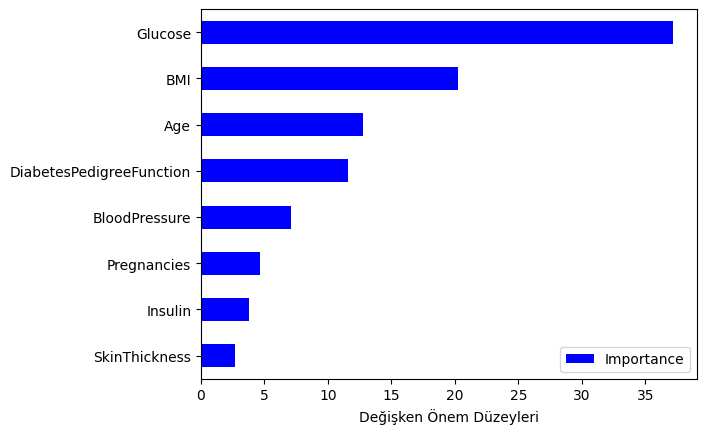

In [11]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                        index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot.barh(color="blue")
plt.xlabel("Değişken Önem Düzeyleri")